In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import scipy as sp
import h5py as h5

import csi.gp          as gp
import csi.postprocess as pp

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mod = pp.csi_mod(h5.File("./dream-trunc3.h5"))
res = [None]*len(mod.items)
for r in mod.iter_res():
    r.sort_psets()
    res[r.target] = r

In [4]:
dataset = 2
ds = [d.data for i,d in enumerate(mod.reps) if i != dataset]
pred = [pp.csi_pred(r, r.psets[0], ds) for r in res]

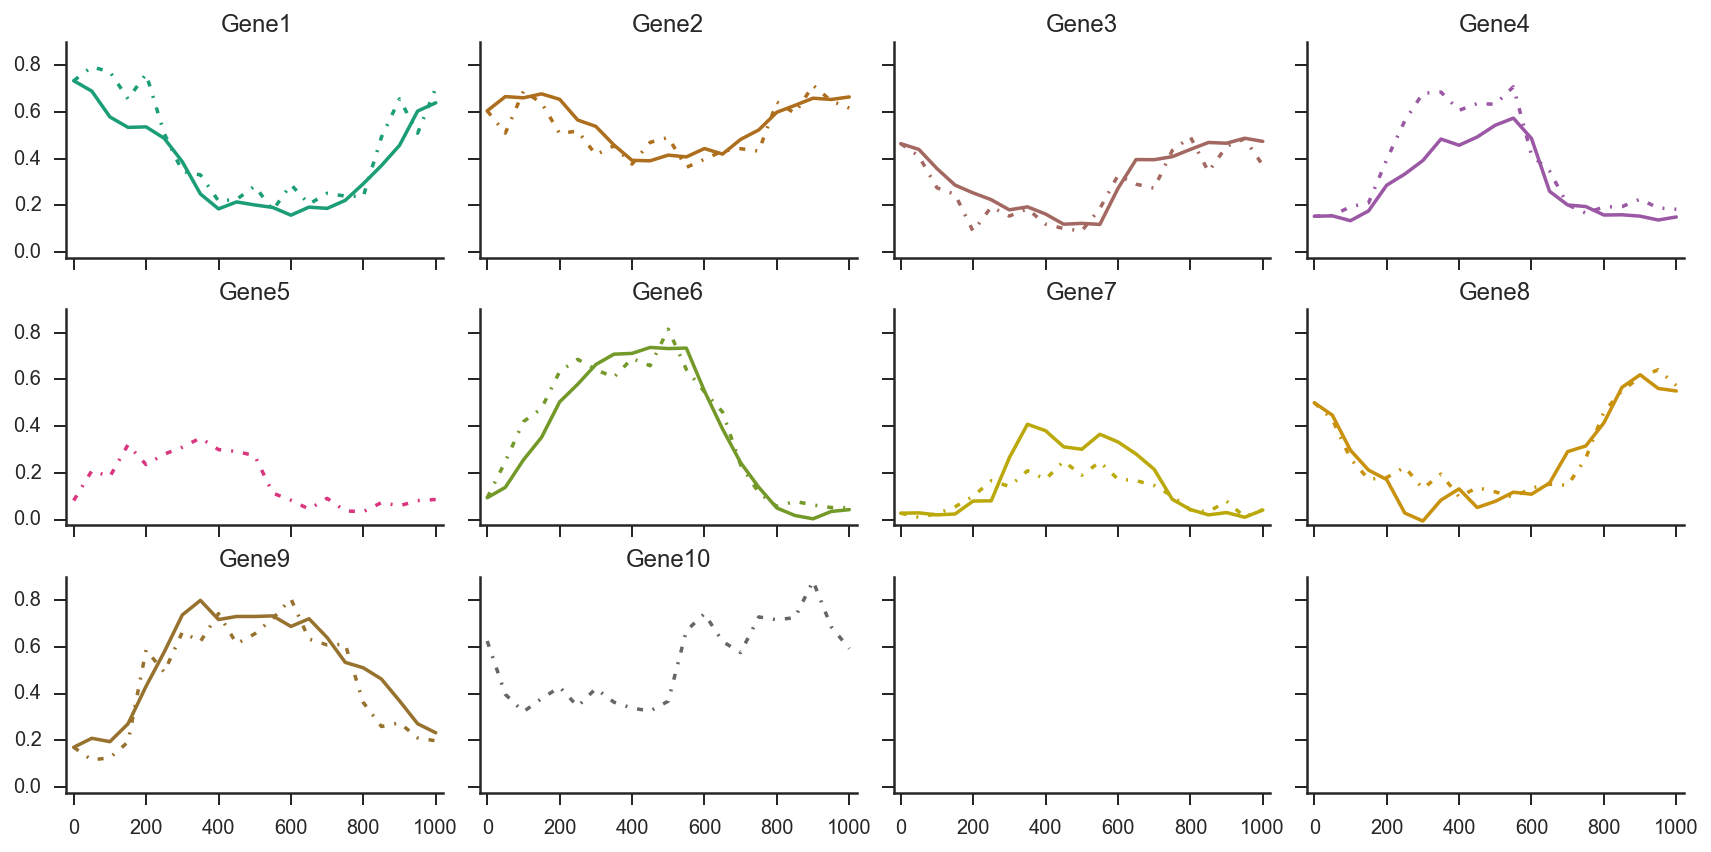

In [9]:
# 4 and 9 difficult
given = [4,9]

# generate predicted expression
out = sp.rand(21,10)
out[:,given] = mod.reps[dataset].data.T[:,given]
out[0,:] = mod.reps[dataset].data.T[0,:]
for i in range(1,len(out)):
        for j in range(10):
            if j in given:
                continue
            mu,var = pred[j].predict1(out[i-1,:])
            out[i,j] = mu[0] + sp.randn() * np.sqrt(var[0,0])

# and plot
with sns.axes_style("ticks"):
    fig,axs = plt.subplots(3,4,figsize=(12,6),sharex=True,sharey=True)

pal = plt.get_cmap('Dark2')(np.linspace(0,1,10))

for i,ax in zip(range(10),axs.flatten()):
    ax.margins(0.02)
    ax.set_title(mod.items[i])
    if i not in given:
        ax.plot(mod.reps[dataset].time,out[:,i],color=pal[i])
    ax.plot(mod.reps[dataset].time, mod.reps[dataset].data.T[:,i],'-.',color=pal[i]);

sns.despine()
fig.tight_layout()